<a href="https://colab.research.google.com/github/hemang03/linearregression/blob/master/Copy_of_simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

## Importing the libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

## Importing the dataset

In [12]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [14]:
reg = sm.OLS(X_train  , y_train).fit()

## Predicting the Test set results

In [25]:
y_pred = reg.predict(X_test)

In [18]:
reg.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.963   
Dependent Variable:     y                AIC:                         58.8472 
Date:                   2020-06-27 08:12 BIC:                         59.8429 
No. Observations:       20               Log-Likelihood:              -28.424 
Df Model:               1                F-statistic:                 525.3   
Df Residuals:           19               Prob (F-statistic):          2.64e-15
R-squared (uncentered): 0.965            Scale:                       1.0574  
------------------------------------------------------------------------------------
          Coef.        Std.Err.          t          P>|t|        [0.025       0.975]
------------------------------------------------------------------------------------
x1        0.0001         0.0000       22.9198       0.0000       0.0001       0.0001
------------------------------------------------------------------------------
Omnibus:                   0.950            Durbin-Watson:               2.787
Prob(Omnibus):             0.622            Jarque-Bera (JB):            0.519
Skew:                      0.390            Prob(JB):                    0.771
Kurtosis:                  2.876            Condition No.:               1    
==============================================================================

"""

<Figure size 576x432 with 0 Axes>

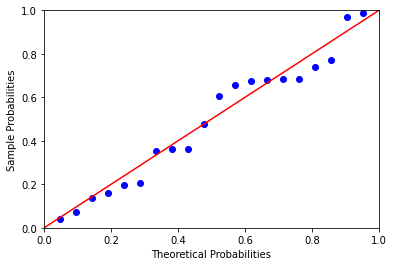

In [19]:
salary_resid = reg.resid
ProbPlot=sm.ProbPlot(data = salary_resid)
plt.figure(figsize=(8,6))
ProbPlot.ppplot(line='45')
plt.show()

In [20]:
def get_standardised_value(vals):
  return (vals - vals.mean())/vals.std()

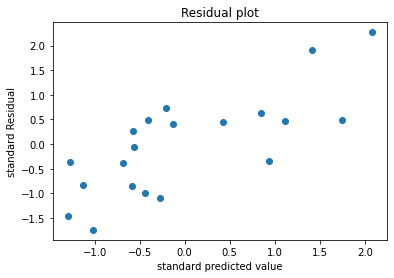

In [21]:
plt.scatter(get_standardised_value(reg.fittedvalues),
            get_standardised_value(reg.resid))
plt.title('Residual plot')
plt.xlabel('standard predicted value')
plt.ylabel('standard Residual')
plt.show()

In [22]:
from scipy.stats import zscore
dataset['z_score_salary'] = zscore(dataset.Salary)
dataset[ (dataset.z_score_salary > 1.0)| (dataset.z_score_salary < -1.0) ]

,YearsExperience,Salary,z_score_salary
0,1.1,39343.0,-1.360113
1,1.3,46205.0,-1.105527
2,1.5,37731.0,-1.419919
3,2.0,43525.0,-1.204957
4,2.2,39891.0,-1.339781
23,8.2,113812.0,1.402741
24,8.7,109431.0,1.240203
25,9.0,105582.0,1.097402
26,9.5,116969.0,1.519868
27,9.6,112635.0,1.359074


In [23]:
# calculating the r2_score anf rmse
from sklearn.metrics import r2_score , mean_squared_error
(r2_score(y_test , y_test))


1.0

In [24]:
np.sqrt(mean_squared_error(y_test , y_pred))


90708.40962058346